In [1]:
# should process in sam.train.dataset
import os


train_dir = './dataset/medical_sinusitis/polygon/train/'

fileEx = '.txt'
# label_list = [os.path.join(train_dir+'label', file) for file in os.listdir(train_dir+'label') if file.endswith(fileEx)]
label_list = [file.split('.txt')[0] for file in os.listdir(train_dir+'labels/') if file.endswith(fileEx)]
# print(txt_list)

coords_list = {}
image_list = {}
clss = {}

for file in label_list:
    with open(train_dir+'/labels/'+file+'.txt', 'r') as txtFile:
        coords_list[file] = list(map(str, (txtFile.read().split('\n'))))

for file_path in coords_list:
    coord_list = list()
    for n, j in enumerate(coords_list[file_path]):
        coord_list.append(list(map(float, j.split())))
        clss[file_path] = coord_list[n].pop(0)
    image_list[file_path] = coord_list

In [13]:
# print(image_list['1normal001_jpg.rf.e6d09ee7e7cdf902e1c63f8d69b1dba3'])

## Preprocess data

In [2]:
import torch
import sys
import os
import cv2
import numpy as np

# library for fine-tuning
import matplotlib.pyplot as plt

device = '0'
if torch.cuda.is_available():
    numOfCuda = int(torch.cuda.device_count())
    if int(device) < numOfCuda:
        print(torch.cuda.get_device_name(device=int(device)))
else:
    print('Warning! No devices detected. check your device or cuda toolkit!')
    sys.exit()

NVIDIA GeForce RTX 3090


### Make bbox for prompt

In [3]:
def polygon2bbox(input_polygons):
    output_polygons = input_polygons.copy()
    for n, polygon in enumerate(input_polygons):
        x1 = polygon[0]
        y1 = polygon[1]
        x2 = polygon[0]
        y2 = polygon[1]
        for xy, instance in enumerate(polygon):
            if xy%2 == 0:
                if x1 > instance:
                    x1 = instance
                if x2 < instance:
                    x2 = instance
            else:
                if y1 > instance:
                    y1 = instance
                if y2 < instance:
                    y2 = instance
        output_polygons[n] = [x1, y1, x2, y2]
    return output_polygons

In [4]:
dataset = 'polygon'
if dataset == 'polygon':
    bbox_coords = {}
    for path in image_list:
        bbox_coords[path] = polygon2bbox(image_list[path])

In [ ]:
print(box_coords['1normal001_jpg.rf.e6d09ee7e7cdf902e1c63f8d69b1dba3'][0])

### make groundtruth

In [5]:
from skimage import draw

ground_truth_masks = {}
for k in image_list.keys():
    gt_size = cv2.imread(os.path.join(train_dir, 'images',k+'.jpg'), cv2.IMREAD_GRAYSCALE).shape[0:2]
    mask_list = list()
    for num, coords in enumerate(image_list[k]):
        temp_list = list()
        for i, coord in enumerate(range(0, len(coords), 2)):
            print(i)
            temp_list.append((int(coords[i*2+1]*gt_size[1]), int(coords[i*2]*gt_size[0])))
        mask_list.append(draw.polygon2mask(gt_size, temp_list))
    ground_truth_masks[k] = mask_list
print(ground_truth_masks['1normal001_jpg.rf.e6d09ee7e7cdf902e1c63f8d69b1dba3'][0])

# for k in image_list.keys():
#     gt_size = cv2.imread(os.path.join(train_dir, 'images',k+'.jpg'), cv2.IMREAD_GRAYSCALE).shape[0:2]
#     mask_list = list()
#     for coords in image_list[k]:
#         mask = draw.polygon2mask(gt_size, coords)
#         mask_list.append(mask)
#     ground_truth_masks[k] = mask_list.copy()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
9
10
11
0
1
2
3
4
5
6
7
8
9
10
11
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
0
1
2
3

In [18]:
print(image_list['1normal001_jpg.rf.e6d09ee7e7cdf902e1c63f8d69b1dba3'])

[[0.6220703125, 0.69921875, 0.6572265625, 0.69921875, 0.6796875, 0.6689453125, 0.693359375, 0.5986328125, 0.693359375, 0.5029296875, 0.685546875, 0.4794921875, 0.6669921875, 0.470703125, 0.6572265625, 0.455078125, 0.6142578125, 0.4375, 0.5869140625, 0.4453125, 0.5703125, 0.4736328125, 0.5703125, 0.5576171875, 0.591796875, 0.6064453125, 0.59375, 0.6787109375, 0.6220703125, 0.69921875], [0.3681640625, 0.689453125, 0.39453125, 0.6630859375, 0.404296875, 0.6044921875, 0.427734375, 0.5556640625, 0.44140625, 0.4873046875, 0.439453125, 0.4521484375, 0.4091796875, 0.42578125, 0.3583984375, 0.431640625, 0.318359375, 0.4677734375, 0.30859375, 0.5126953125, 0.30859375, 0.6396484375, 0.31640625, 0.6728515625, 0.3349609375, 0.6875, 0.3681640625, 0.689453125]]


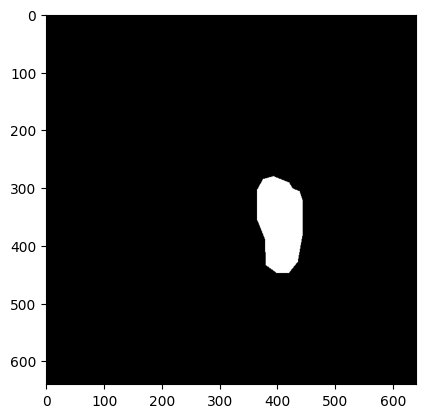

In [19]:
plt.imshow(ground_truth_masks['1normal001_jpg.rf.e6d09ee7e7cdf902e1c63f8d69b1dba3'][0], cmap="gray")
# numoftrue=0
# for x in ground_truth_masks['1normal001_jpg.rf.e6d09ee7e7cdf902e1c63f8d69b1dba3'][0]:
#     for y in x:
#         if (y == True):
#             numoftrue+=1

## Prepare Fine-Tuning

In [6]:
model_type = 'vit_h'
# checkpoint = 'sam_vit_b_01ec64.pth'
# checkpoint = 'sam_vit_h_4b8939.pth'
checkpoint = 'sam_vit_h_4b8939_fine_medical_5_0.0001all.pth'
device = 'cuda:'+device

In [7]:
from segment_anything import SamPredictor, sam_model_registry
sam_model = sam_model_registry[model_type](checkpoint=checkpoint)
sam_model.to(device)
sam_model.train();

In [8]:
# Preprocess the images
from collections import defaultdict

import torch

from segment_anything.utils.transforms import ResizeLongestSide

transformed_data = defaultdict(dict)
for k in bbox_coords.keys():
  image = cv2.imread(train_dir+'images/'+k+'.jpg')
  # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  transform = ResizeLongestSide(sam_model.image_encoder.img_size)
  input_image = transform.apply_image(image)
  input_image_torch = torch.as_tensor(input_image, device=device)
  transformed_image = input_image_torch.permute(2, 0, 1).contiguous()[None, :, :, :]

  input_image = sam_model.preprocess(transformed_image)
  original_image_size = image.shape[:2]
  input_size = tuple(transformed_image.shape[-2:])

  transformed_data[k]['image'] = input_image
  transformed_data[k]['input_size'] = input_size
  transformed_data[k]['original_image_size'] = original_image_size

In [9]:
# Set up the optimizer, hyperparameter tuning will improve performance here
lr = 1e-4
# lr = 1e-1
wd = 0
optimizer = torch.optim.Adam(sam_model.mask_decoder.parameters(), lr=lr, weight_decay=wd)

loss_fn = torch.nn.MSELoss()
# loss_fn = torch.nn.BCELoss()
# keys = list(bbox_coords.keys())

## Run fine-tuning

In [39]:
from statistics import mean
from torch.nn.functional import threshold, normalize

import wandb

# num_epochs = 100
# num_epochs = 10
num_epochs = 5
losses = []

wandb.init(
   project="SAM",
   name = "sam_test",
   config={
      "epochs": num_epochs,
      "lr": lr,
      "optmizer": 'Adam',
      "loss_fn" : 'MSELoss',
      "dataset": 'medical'
   }
)

for epoch in range(num_epochs):
  epoch_losses = []
  for k in bbox_coords.keys():
    input_image = transformed_data[k]['image'].to(device)
    input_size = transformed_data[k]['input_size']
    original_image_size = transformed_data[k]['original_image_size']
    for i in range(len(bbox_coords[k])):
    # for i in range(1):
        # No grad here as we don't want to optimise the encoders
        with torch.no_grad():
            image_embedding = sam_model.image_encoder(input_image)

            prompt_box = np.array(bbox_coords[k][i]) ##########################
            box = transform.apply_boxes(prompt_box, original_image_size)
            box_torch = torch.as_tensor(box, dtype=torch.float, device=device)
            box_torch = box_torch[None, :]

            sparse_embeddings, dense_embeddings = sam_model.prompt_encoder(
              points=None,
              boxes=box_torch,
              masks=None,
            )
        low_res_masks, iou_predictions = sam_model.mask_decoder(
          image_embeddings=image_embedding,
          image_pe=sam_model.prompt_encoder.get_dense_pe(),
          sparse_prompt_embeddings=sparse_embeddings,
          dense_prompt_embeddings=dense_embeddings,
          multimask_output=False,
        )

        upscaled_masks = sam_model.postprocess_masks(low_res_masks, input_size, original_image_size).to(device)
        binary_mask = normalize(threshold(upscaled_masks, 0.0, 0))

        gt_mask_resized = torch.from_numpy(np.resize(ground_truth_masks[k][i], (1, 1, ground_truth_masks[k][i].shape[0], ground_truth_masks[k][i].shape[1]))).to(device)#######################
        gt_binary_mask = torch.as_tensor(gt_mask_resized > 0, dtype=torch.float32).to(device)

        loss = loss_fn(binary_mask, gt_binary_mask)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
  losses.append(epoch_losses)
  print(f'EPOCH: {epoch}')
  print(f'Mean loss: {mean(epoch_losses)}')
  wandb.log({'epoch': epoch, 'mean_loss': mean(epoch_losses)})
# torch.save(sam_model.state_dict(), './sam_vit_h_4b8939_fine_'+str(num_epochs)+'_'+str(lr)+'.pth')
# torch.save(sam_model.state_dict(), './sam_vit_h_4b8939_fine_medical_'+str(num_epochs)+'_'+str(lr)+'all'+'.pth')
torch.save(sam_model.state_dict(), './sam_vit_h_4b8939_fine_medical_'+'5'+'_'+str(lr)+'all_test'+'.pth')
mean_losses = [mean(x) for x in losses]
mean_losses


wandb.finish()

# plt.plot(list(range(len(mean_losses))), mean_losses)
# plt.title('Mean epoch loss')
# plt.xlabel('Epoch Number')
# plt.ylabel('Loss')

# # plt.savefig('./sam_vit_h_4b8939_fine_medical_'+str(num_epochs)+'_'+str(lr)+'all'+'.png')
# plt.savefig('./sam_vit_h_4b8939_fine_medical_'+'5'+'_'+str(lr)+'all_test'+'.png')
# plt.show()

Problem at: /tmp/ipykernel_45003/2928698503.py 11 <module>


Traceback (most recent call last):
  File "/home/IULab/anaconda3/envs/sam/lib/python3.10/site-packages/wandb/sdk/wandb_init.py", line 1147, in init
    run = wi.init()
  File "/home/IULab/anaconda3/envs/sam/lib/python3.10/site-packages/wandb/sdk/wandb_init.py", line 601, in init
    manager._inform_init(settings=self.settings, run_id=self.settings.run_id)
  File "/home/IULab/anaconda3/envs/sam/lib/python3.10/site-packages/wandb/sdk/wandb_manager.py", line 207, in _inform_init
    svc_iface._svc_inform_init(settings=settings, run_id=run_id)
  File "/home/IULab/anaconda3/envs/sam/lib/python3.10/site-packages/wandb/sdk/service/service_sock.py", line 37, in _svc_inform_init
    self._sock_client.send(inform_init=inform_init)
  File "/home/IULab/anaconda3/envs/sam/lib/python3.10/site-packages/wandb/sdk/lib/sock_client.py", line 211, in send
    self.send_server_request(server_req)
  File "/home/IULab/anaconda3/envs/sam/lib/python3.10/site-packages/wandb/sdk/lib/sock_client.py", line 155, in

Error: An unexpected error occurred

In [38]:

wandb.finish()

In [ ]:
from statistics import mean

from torch.nn.functional import threshold, normalize

import math

num_epochs = 5
batch_size = 64
iteration = math.ceil(len(bbox_coords)/batch_size)
losses = []

for epoch in range(num_epochs):
    epoch_losses = []
    for n in range(1, iteration+1):
        iteration_losses = []
        # for key in list(bbox_coords.keys())[batch_size*(n-1):batch_size*n]:
        #     input_image = transformed_data[key]['image'].to(device)
        #     input_size = transformed_data[key]['input_size']
        #     original_image_size = transformed_data[key]['original_image_size']
        for key in list(bbox_coords.keys())[batch_size*(n-1):batch_size*n]:
            transformed_data[key]['image'] = transformed_data[key]['image'].to(device)
            # input_size = transformed_data[key]['input_size']
            # original_image_size = transformed_data[key]['original_image_size']
        print('iteration: ', n,'/',iteration)
        for key in list(bbox_coords.keys())[batch_size*(n-1):batch_size*n]:
            input_image = transformed_data[key]['image'].to(device)
            input_size = transformed_data[key]['input_size']
            original_image_size = transformed_data[key]['original_image_size']
            for i in range(len(bbox_coords[key])):
                with torch.no_grad():
                    image_embedding = sam_model.image_encoder(input_image)
        
                    prompt_box = np.array(bbox_coords[key][i]) ##########################
                    box = transform.apply_boxes(prompt_box, original_image_size)
                    box_torch = torch.as_tensor(box, dtype=torch.float, device=device)
                    box_torch = box_torch[None, :]
        
                    sparse_embeddings, dense_embeddings = sam_model.prompt_encoder(
                        points=None,
                        boxes=box_torch,
                        masks=None,
                    )
                low_res_masks, iou_predictions = sam_model.mask_decoder(
                  image_embeddings=image_embedding,
                  image_pe=sam_model.prompt_encoder.get_dense_pe(),
                  sparse_prompt_embeddings=sparse_embeddings,
                  dense_prompt_embeddings=dense_embeddings,
                  multimask_output=False,
                )
        
                upscaled_masks = sam_model.postprocess_masks(low_res_masks, input_size, original_image_size).to(device)
                binary_mask = normalize(threshold(upscaled_masks, 0.0, 0))
        
                gt_mask_resized = torch.from_numpy(np.resize(ground_truth_masks[key][i], (1, 1, ground_truth_masks[key][i].shape[0], ground_truth_masks[key][i].shape[1]))).to(device)#######################
                gt_binary_mask = torch.as_tensor(gt_mask_resized > 0, dtype=torch.float32)
        
                loss = loss_fn(binary_mask, gt_binary_mask)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_losses.append(loss.item())
                iteration_losses.append(loss.item())
        print(mean(iteration_losses))
        # print(mean(epoch_losses))
    losses.append(epoch_losses)
    print(f'EPOCH: {epoch}')
    print(f'Mean loss: {mean(epoch_losses)}')   
torch.save(sam_model.state_dict(), './sam_vit_h_4b8939_fine_medical_test_'+str(num_epochs)+'_'+str(lr)+'all'+'.pth')
mean_losses = [mean(x) for x in losses]
mean_losses

plt.plot(list(range(len(mean_losses))), mean_losses)
plt.title('Mean epoch loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')

# plt.savefig('./sam_vit_h_4b8939_fine_medical_'+str(num_epochs)+'_'+str(lr)+'all'+'.png')
plt.savefig('./sam_vit_h_4b8939_fine_medical_test_'+str(num_epochs)+'_'+str(lr)+'all'+'.png')
plt.show()
    # print(len(list(bbox_coords.items())[:batch_size]))
    # print(list(bbox_coords.items())[:batch_size])

iteration:  1 / 11
0.016609393290493414
iteration:  2 / 11



KeyboardInterrupt



In [15]:
from statistics import mean

from torch.nn.functional import threshold, normalize

import math

num_epochs = 5
batch_size = 64
iteration = math.ceil(len(bbox_coords)/batch_size)
losses = []

for epoch in range(num_epochs):
    epoch_losses = []
    for n in range(1, iteration+1):
        for key in list(bbox_coords.keys())[batch_size*(n-1):batch_size*n]:
            transformed_data[key]['image'] = transformed_data[key]['image'].to(device)
            # input_size = transformed_data[key]['input_size']
            # original_image_size = transformed_data[key]['original_image_size']
        print('iteration: ', n,'/',iteration)
        for key in list(bbox_coords.keys())[batch_size*(n-1):batch_size*n]:
            input_image = transformed_data[key]['image']
            input_size = transformed_data[key]['input_size']
            original_image_size = transformed_data[key]['original_image_size']
            for i in range(len(bbox_coords[key])):
                with torch.no_grad():
                    image_embedding = sam_model.image_encoder(input_image)
        
                    prompt_box = np.array(bbox_coords[key][i]) ##########################
                    box = transform.apply_boxes(prompt_box, original_image_size)
                    box_torch = torch.as_tensor(box, dtype=torch.float, device=device)
                    box_torch = box_torch[None, :]
        
                    sparse_embeddings, dense_embeddings = sam_model.prompt_encoder(
                        points=None,
                        boxes=box_torch,
                        masks=None,
                    )
                low_res_masks, iou_predictions = sam_model.mask_decoder(
                  image_embeddings=image_embedding,
                  image_pe=sam_model.prompt_encoder.get_dense_pe(),
                  sparse_prompt_embeddings=sparse_embeddings,
                  dense_prompt_embeddings=dense_embeddings,
                  multimask_output=False,
                )
        
                upscaled_masks = sam_model.postprocess_masks(low_res_masks, input_size, original_image_size).to(device)
                binary_mask = normalize(threshold(upscaled_masks, 0.0, 0))
        
                gt_mask_resized = torch.from_numpy(np.resize(ground_truth_masks[key][i], (1, 1, ground_truth_masks[key][i].shape[0], ground_truth_masks[key][i].shape[1]))).to(device)#######################
                gt_binary_mask = torch.as_tensor(gt_mask_resized > 0, dtype=torch.float32)
        
                loss = loss_fn(binary_mask, gt_binary_mask)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_losses.append(loss.item())
        # print(mean(epoch_losses))
    losses.append(epoch_losses)
    print(f'EPOCH: {epoch}')
    print(f'Mean loss: {mean(epoch_losses)}')   
torch.save(sam_model.state_dict(), './sam_vit_h_4b8939_fine_medical_test_'+str(num_epochs)+'_'+str(lr)+'all'+'.pth')
mean_losses = [mean(x) for x in losses]
mean_losses

plt.plot(list(range(len(mean_losses))), mean_losses)
plt.title('Mean epoch loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')

# plt.savefig('./sam_vit_h_4b8939_fine_medical_'+str(num_epochs)+'_'+str(lr)+'all'+'.png')
plt.savefig('./sam_vit_h_4b8939_fine_medical_test_'+str(num_epochs)+'_'+str(lr)+'all'+'.png')
plt.show()

iteration:  1 / 11
0.016609393290493414
iteration:  2 / 11


KeyboardInterrupt: 

In [10]:
from statistics import mean

from tqdm import tqdm
from torch.nn.functional import threshold, normalize

# num_epochs = 100
# num_epochs = 10
num_epochs = 5
losses = []

for epoch in range(num_epochs):
  epoch_losses = []
  for k in bbox_coords.keys():
    input_image = transformed_data[k]['image'].to(device)
    input_size = transformed_data[k]['input_size']
    original_image_size = transformed_data[k]['original_image_size']
    for i in range(len(bbox_coords[k])):
    # for i in range(1):
        # No grad here as we don't want to optimise the encoders
        with torch.no_grad():
          image_embedding = sam_model.image_encoder(input_image)

          prompt_box = np.array(bbox_coords[k][i]) ##########################
          box = transform.apply_boxes(prompt_box, original_image_size)
          box_torch = torch.as_tensor(box, dtype=torch.float, device=device)
          box_torch = box_torch[None, :]

          sparse_embeddings, dense_embeddings = sam_model.prompt_encoder(
              points=None,
              boxes=box_torch,
              masks=None,
          )
        low_res_masks, iou_predictions = sam_model.mask_decoder(
          image_embeddings=image_embedding,
          image_pe=sam_model.prompt_encoder.get_dense_pe(),
          sparse_prompt_embeddings=sparse_embeddings,
          dense_prompt_embeddings=dense_embeddings,
          multimask_output=False,
        )

        upscaled_masks = sam_model.postprocess_masks(low_res_masks, input_size, original_image_size).to(device)
        binary_mask = normalize(threshold(upscaled_masks, 0.0, 0))

        gt_mask_resized = torch.from_numpy(np.resize(ground_truth_masks[k][i], (1, 1, ground_truth_masks[k][i].shape[0], ground_truth_masks[k][i].shape[1]))).to(device)#######################
        gt_binary_mask = torch.as_tensor(gt_mask_resized > 0, dtype=torch.float32)

        loss = loss_fn(binary_mask, gt_binary_mask)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
  losses.append(epoch_losses)
  print(f'EPOCH: {epoch}')
  print(f'Mean loss: {mean(epoch_losses)}')
# torch.save(sam_model.state_dict(), './sam_vit_h_4b8939_fine_'+str(num_epochs)+'_'+str(lr)+'.pth')
# torch.save(sam_model.state_dict(), './sam_vit_h_4b8939_fine_medical_'+str(num_epochs)+'_'+str(lr)+'all'+'.pth')
torch.save(sam_model.state_dict(), './sam_vit_h_4b8939_fine_medical_'+'10'+'_'+str(lr)+'all'+'.pth')
mean_losses = [mean(x) for x in losses]
mean_losses

plt.plot(list(range(len(mean_losses))), mean_losses)
plt.title('Mean epoch loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')

# plt.savefig('./sam_vit_h_4b8939_fine_medical_'+str(num_epochs)+'_'+str(lr)+'all'+'.png')
plt.savefig('./sam_vit_h_4b8939_fine_medical_'+'10'+'_'+str(lr)+'all'+'.png')
plt.show()

EPOCH: 0
Mean loss: 0.017499498904590606
EPOCH: 1
Mean loss: 0.017499498904590606



KeyboardInterrupt

